# What is PyCaret and Why Should you Use it?
PyCaret is an open-source, machine learning library in Python that helps you from data preparation to model deployment. It is easy to use and you can do almost every data science project task with just one line of code.

https://pycaret.org/

# 
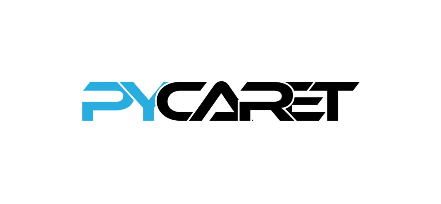

In [2]:
import numpy as np
import pandas as pd
import pandas_profiling
import scipy.stats
import warnings
warnings.filterwarnings('ignore')
import pycaret

In [3]:
data=pd.read_csv('Dataset.csv')

In [6]:
data.shape

(480, 17)

In [7]:
data.dtypes

gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object

In [4]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [40]:
from sklearn.model_selection import train_test_split

In [42]:
train, test = train_test_split(data, test_size=0.2)

In [43]:
train.shape, test.shape

((384, 17), (96, 17))

## The very first step before we start our machine learning project in PyCaret is to set up the environment. It’s just a two-step process:

**Importing a Module:** Depending upon the type of problem you are going to solve, you first need to import the module. In the first version of PyCaret, 6 different modules are available – regression, classification, clustering, natural language processing (NLP), anomaly detection, and associate mining rule. In this article, we will solve a classification problem and hence we will import the classification module

**Initializing the Setup:** In this step, PyCaret performs some basic preprocessing tasks, like ignoring the IDs and Date Columns, imputing the missing values, encoding the categorical variables, and splitting the dataset into the train-test split for the rest of the modeling steps. When you run the setup function, it will first confirm the data types, and then if you press enter, it will create the environment for you to go ahead

In [44]:
# import the classification module 
from pycaret import classification
# setup the environment 
classification_setup = classification.setup(data= train, target='Class')

,Description,Value
0,session_id,3228
1,Target,Class
2,Target Type,Multiclass
3,Label Encoded,"H: 0, L: 1, M: 2"
4,Original Data,"(384, 17)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,12
8,Ordinal Features,False
9,High Cardinality Features,False


# Training our Machine Learning Model using PyCaret



## Training a Model

Training a model in PyCaret is quite simple. You just need to use the create_model function that takes just the one parameter – the model abbreviation as a string. Here, we are going to first train a decision tree model for which we have to pass “dt” and it will return a table with k-fold cross-validated scores of common evaluation metrics used for classification models.

Here’s q quick reminder of the evaluation metrics used for supervised learning:

**Classification:** Accuracy, AUC, Recall, Precision, F1, Kappa
**Regression:** MAE, MSE, RMSE, R2, RMSLE, MAPE

In [45]:
# build the decision tree model
classification_dt = classification.create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4815,0.5827,0.5310,0.4689,0.4705,0.2025,0.2043
1,0.8148,0.8643,0.8498,0.8370,0.8125,0.7188,0.7326
2,0.5926,0.6393,0.5421,0.5700,0.5619,0.3125,0.3310
3,0.6667,0.7377,0.6567,0.6593,0.6564,0.4830,0.4872
4,0.6667,0.7474,0.6964,0.6708,0.6600,0.5000,0.5074
5,0.6667,0.7320,0.6627,0.6756,0.6696,0.4808,0.4818
6,0.7037,0.7557,0.6845,0.7106,0.6931,0.5315,0.5401
7,0.6667,0.7307,0.6746,0.6655,0.6612,0.4819,0.4850
8,0.7692,0.8095,0.7500,0.7909,0.7710,0.6321,0.6368
9,0.6923,0.7488,0.6806,0.6964,0.6924,0.5117,0.5130


In [46]:
# build the xgboost model
classification_xgb = classification.create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6667,0.7531,0.6752,0.6799,0.6712,0.4636,0.4647
1,0.7778,0.8902,0.8242,0.8039,0.7711,0.6667,0.6852
2,0.7037,0.8222,0.6850,0.7136,0.7019,0.5200,0.5250
3,0.7407,0.8754,0.7460,0.7331,0.7321,0.6021,0.6059
4,0.8148,0.9606,0.8472,0.8293,0.8111,0.7216,0.7323
5,0.7407,0.9155,0.7302,0.7870,0.7342,0.5900,0.6080
6,0.7037,0.7810,0.6905,0.7153,0.7028,0.5325,0.5374
7,0.7037,0.7635,0.6825,0.7593,0.7002,0.5263,0.5469
8,0.7692,0.8420,0.7917,0.7769,0.7673,0.6455,0.6514
9,0.6538,0.8162,0.6389,0.6835,0.6564,0.4375,0.4457


## Hyperparameter Tuning
We can tune the hyperparameters of a machine learning model by just using the tune_model function which takes one parameter – the model abbreviation string (the same as we used in the create_model function).

PyCaret provides us a lot of flexibility. For example, we can define the number of folds using the fold parameter within the tune_model function. Or we can change the number of iterations using the n_iter parameter. Increasing the n_iter parameter will obviously increase the training time but will give a much better performance.

Let’s tune XGBoost model:

In [47]:
# Tune the xgboost model
tune_xgboost = classification.tune_model(classification_xgb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6296,0.8043,0.6496,0.6296,0.6296,0.4130,0.4130
1,0.7778,0.8759,0.8242,0.8039,0.7711,0.6667,0.6852
2,0.7778,0.8590,0.7802,0.7809,0.7772,0.6494,0.6508
3,0.6667,0.8435,0.6627,0.6686,0.6662,0.4797,0.4807
4,0.8519,0.9582,0.8750,0.8609,0.8497,0.7759,0.7825
5,0.8148,0.9242,0.8135,0.8181,0.8148,0.7115,0.7131
6,0.7037,0.8186,0.6905,0.7425,0.7054,0.5315,0.5401
7,0.7037,0.8389,0.6825,0.7309,0.6992,0.5253,0.5420
8,0.8077,0.8719,0.8333,0.8263,0.8031,0.7072,0.7219
9,0.7308,0.8193,0.7361,0.7426,0.7344,0.5728,0.5742


In [16]:
# build and tune the catboost model
tune_catboost = classification.tune_model('catboost')


TypeError: The behavior of tune_model in version 1.0.1 is changed. Please pass trained model object.

## Building Ensemble Models using PyCaret
Ensemble models in machine learning combine the decisions from multiple models to improve the overall performance.

In [48]:
# ensemble boosting
boosting = classification.ensemble_model(classification_dt, method= 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4815,0.5921,0.5470,0.4714,0.4655,0.2190,0.2246
1,0.8519,0.9000,0.8974,0.8898,0.8494,0.7778,0.7994
2,0.6667,0.7000,0.6154,0.6461,0.6215,0.4375,0.4687
3,0.7407,0.7974,0.7262,0.7259,0.7263,0.5979,0.6031
4,0.6667,0.7474,0.6964,0.6708,0.6600,0.5000,0.5074
5,0.6667,0.7250,0.6488,0.7111,0.6724,0.4717,0.4817
6,0.7037,0.7557,0.6845,0.7106,0.6931,0.5315,0.5401
7,0.6296,0.6904,0.6190,0.6420,0.6009,0.4092,0.4304
8,0.8077,0.8373,0.8056,0.8166,0.8098,0.6948,0.6966
9,0.6923,0.7381,0.6806,0.7198,0.6964,0.5048,0.5100


### Another very famous ensembling technique is blending. You just need to pass the models that you have created in a list of the blend_models function.

In [49]:
# Ensemble: blending
blender = classification.blend_models(estimator_list=[classification_dt, classification_xgb])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4815,0.7098,0.5310,0.4689,0.4705,0.2025,0.2043
1,0.8148,0.9090,0.8498,0.8370,0.8125,0.7188,0.7326
2,0.5926,0.8222,0.5421,0.5700,0.5619,0.3125,0.3310
3,0.6667,0.8654,0.6567,0.6593,0.6564,0.4830,0.4872
4,0.6667,0.9162,0.6964,0.6708,0.6600,0.5000,0.5074
5,0.6667,0.8771,0.6627,0.6756,0.6696,0.4808,0.4818
6,0.7037,0.8233,0.6845,0.7106,0.6931,0.5315,0.5401
7,0.6667,0.7645,0.6746,0.6655,0.6612,0.4819,0.4850
8,0.7692,0.8564,0.7500,0.7909,0.7710,0.6321,0.6368
9,0.6923,0.8386,0.6806,0.6964,0.6924,0.5117,0.5130


## Compare Models

This is another useful function of the PyCaret library. If you do not want to try the different models one by one, you can use the compare models function and it will train and compare common evaluation metrics for all the available models in the library of the module you have imported.

In [50]:
# compare performance of different classification models
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7614,0.8735,0.7617,0.7790,0.7590,0.6228,0.6329,0.0720
catboost,CatBoost Classifier,0.7610,0.8690,0.7623,0.7825,0.7586,0.6221,0.6338,1.7230
et,Extra Trees Classifier,0.7389,0.8769,0.7347,0.7550,0.7387,0.5874,0.5942,0.0640
lightgbm,Light Gradient Boosting Machine,0.7387,0.8419,0.7428,0.7614,0.7361,0.5893,0.6001,0.0620
xgboost,Extreme Gradient Boosting,0.7275,0.8420,0.7311,0.7482,0.7248,0.5706,0.5802,0.2020
gbc,Gradient Boosting Classifier,0.7088,0.8312,0.7131,0.7280,0.7073,0.5410,0.5496,0.0900
lr,Logistic Regression,0.6906,0.8314,0.7010,0.7009,0.6886,0.5163,0.5215,0.0990
ada,Ada Boost Classifier,0.6752,0.7797,0.6891,0.6966,0.6686,0.4964,0.5096,0.0300
dt,Decision Tree Classifier,0.6721,0.7348,0.6728,0.6745,0.6649,0.4855,0.4919,0.0080
lda,Linear Discriminant Analysis,0.6645,0.8198,0.6919,0.6760,0.6596,0.4879,0.4966,0.0100


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=3228, verbose=0,
                       warm_start=False)

# Let’s Analyze our Model!

**Now, after training the model, the next step is to analyze the results. This especially useful from a business perspective, right? Analyzing a model in PyCaret is again very simple. Just a single line of code and you can do the following:**

**Plot Model Results:** Analyzing model performance in PyCaret is as simple as writing plot_model. You can plot decision boundaries, precision-recall curve, validation curve, residual plots, etc.. Also, for clustering models, you can plot the elbow plot and silhouette plot. For text data, you can plot word clouds, bigram and trigram frequency plots, etc.

**Interpret Results:** Interpreting model results helps in debugging the model by analyzing the important features. This is a crucial step in industry-grade machine learning projects. In PyCaret, we can interpret the model by SHAP values and correlation plot with just one line of code (getting to be quite a theme this, isn’t it?)

In [52]:
# build the best model : Extra Tree Classifier
classification_et = classification.create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7037,0.8373,0.7329,0.7131,0.7037,0.5404,0.5451
1,0.7778,0.9029,0.7802,0.8025,0.7809,0.6494,0.6550
2,0.7407,0.8282,0.7326,0.7451,0.7413,0.5855,0.5869
3,0.7037,0.8897,0.6905,0.7125,0.7043,0.5335,0.5371
4,0.7407,0.9270,0.7440,0.7491,0.7390,0.5970,0.6009
5,0.6667,0.8742,0.6687,0.6747,0.6691,0.4797,0.4807
6,0.7778,0.8748,0.7599,0.8072,0.7744,0.6486,0.6591
7,0.7778,0.9116,0.7520,0.8117,0.7769,0.6432,0.6622
8,0.8077,0.9172,0.8194,0.8092,0.8069,0.7018,0.7035
9,0.6923,0.8058,0.6667,0.7244,0.6901,0.4951,0.5116


In [55]:
# build the best model : Extra Tree Classifier
classification_rf = classification.create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7037,0.8328,0.7169,0.7202,0.7096,0.5284,0.5296
1,0.8148,0.9196,0.8718,0.8646,0.8072,0.7256,0.7550
2,0.6667,0.8115,0.6374,0.6725,0.6611,0.4527,0.4607
3,0.7778,0.8961,0.7738,0.7695,0.7717,0.6561,0.6575
4,0.8889,0.9739,0.8889,0.8893,0.8874,0.8269,0.8287
5,0.7778,0.8889,0.7718,0.7866,0.7757,0.6509,0.6567
6,0.6667,0.8304,0.6488,0.6857,0.6667,0.4694,0.4772
7,0.7407,0.8588,0.7103,0.7999,0.7341,0.5809,0.6122
8,0.8462,0.9005,0.8611,0.8699,0.8465,0.7626,0.7749
9,0.7308,0.8230,0.7361,0.7316,0.7297,0.5748,0.5762


## Plot Model Results
You can plot model results by providing the model object as the parameter and the type of plot you want. Let’s plot the AUC-ROC curve and decision boundary:

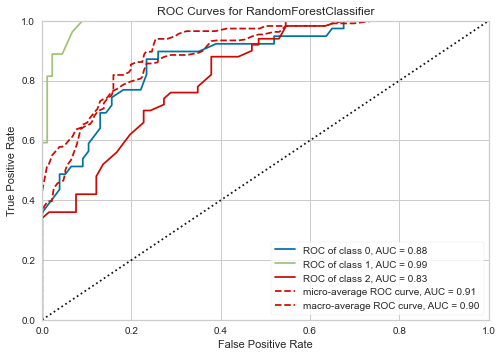

In [56]:
# AUC-ROC plot
classification.plot_model(classification_rf, plot = 'auc')


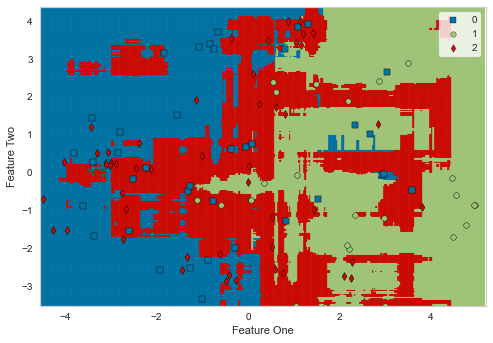

In [57]:

# Decision Boundary
classification.plot_model(classification_rf, plot = 'boundary')

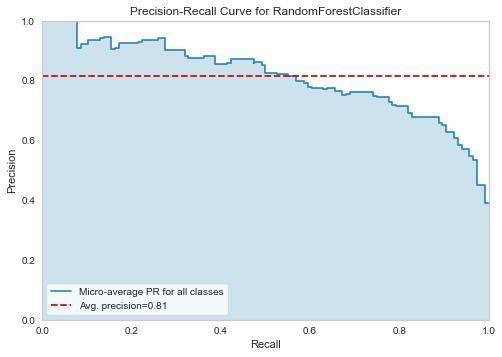

In [58]:
# Precision Recall Curve
classification.plot_model(classification_rf, plot = 'pr')


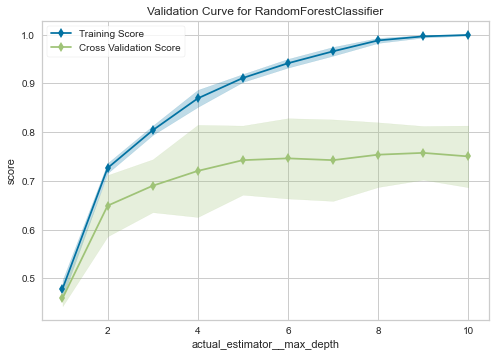

In [59]:
# Validation Curve
classification.plot_model(classification_rf, plot = 'vc')

## Evaluate our Model
If you do not want to plot all these visualizations individually, then the PyCaret library has another amazing function – evaluate_model. In this function, you just need to pass the model object and PyCaret will create an interactive window for you to see and analyze the model in all the possible ways:

In [60]:
# evaluate model
classification.evaluate_model(classification_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Interpret our Model
Interpreting complex models is very important in most machine learning projects. It helps in debugging the model by analyzing what the model thinks is important. In PyCaret, this step is as simple as writing interpret_model to get the Shapley values.

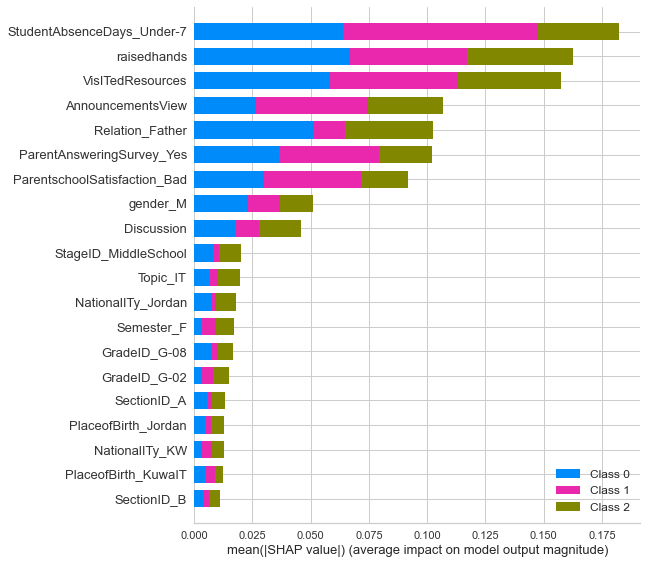

In [61]:
# interpret_model: SHAP
classification.interpret_model(classification_rf)

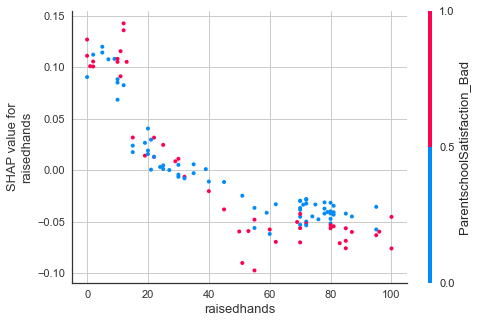

In [62]:
# interpret model : Correlation
classification.interpret_model(classification_rf,plot='correlation')

# Time to Make Predictions!

Finally, we will make predictions on unseen data. For this, we just need to pass the model that we will use for the predictions and the dataset. Make sure it is in the same format as we provided while setting up the environment earlier. 

PyCaret builds a pipeline of all the steps and will pass the unseen data into the pipeline and give us the results.

In [63]:
# make predictions
predictions = classification.predict_model(classification_rf, data=test)
# view the predictions
predictions

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Label,Score
440,M,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Mum,89,87,86,15,Yes,Good,Under-7,M,M,0.55
384,F,Iraq,Iraq,lowerlevel,G-02,B,Arabic,F,Mum,89,92,40,28,Yes,Good,Under-7,H,H,0.88
58,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,28,60,19,50,Yes,Good,Under-7,M,M,0.68
25,M,KW,KuwaIT,MiddleSchool,G-07,A,IT,F,Father,8,7,30,40,Yes,Good,Above-7,L,M,0.52
50,F,KW,KuwaIT,HighSchool,G-12,A,English,F,Father,20,14,12,70,No,Bad,Above-7,L,L,0.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,M,Jordan,Jordan,MiddleSchool,G-07,A,Biology,S,Mum,3,8,19,3,No,Bad,Above-7,L,L,0.81
41,M,KW,KuwaIT,MiddleSchool,G-07,A,IT,F,Father,19,20,16,50,No,Good,Under-7,M,M,0.69
451,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,19,98,20,2,Yes,Good,Under-7,H,M,0.48
472,M,Palestine,Palestine,MiddleSchool,G-08,A,Geology,F,Father,80,87,74,68,Yes,Good,Under-7,M,M,0.52


## Save and Load the Model
Now, once the model is built and tested, we can save this in the pickle file using the save_model function. Pass the model to be saved and the file name and that’s it:

In [64]:
# save the model
classification.save_model(classification_rf, 'Random Forest')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                         max_l

### We can load this model later on and predict labels on the unseen data:

In [65]:
# load model
rf_model = classification.load_model(model_name='Random Forest')

Transformation Pipeline and Model Successfully Loaded
